In [1]:
import sys, os
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1, '../scripts')
root = os.getcwd()


from TwintDataMiner import TwintDataMiner
from PandasDataCleaner import PandasDataCleaner
from TextBlobSentiment import TextBlobSentiment
from Visualisation import Visualisation
from GMM import GMM


In [2]:
tweetsFile = "../data/1000TweetsPerDay.csv"
tdm = TwintDataMiner()
attributes = ["id", "tweet", "place", "date"]
df = tdm.getPandasDataFrame(attributes, tweetsFile)
df.shape
df.head

<bound method NDFrame.head of                         id                                              tweet  \
0                       id                                              tweet   
1      1212480089155354628  El M*gnici*io es la única opción para Venezuel...   
2      1212479875220566016  plying to @ironorehopper\nInteresting, further...   
3      1212475589325676544  Bienvenidos a los Fabulosos años 20 con @Mierc...   
4      1212473830758899715  Meu Deus, tão inventando nome pra tudo "White ...   
...                    ...                                                ...   
89952  1247297335035641859  Wisconsin Supreme Court, on primary eve, block...   
89953  1247297334741999616  What is becoming of us?    Teen Girls Attack #...   
89954  1247297333743751168  Why does every article about this talks about ...   
89955  1247297333676605440  Recado para senhora corona vírus:\n\nse vc se ...   
89956  1247297333601153024  Schumer names coronavirus czar candidates in p...  

In [3]:
df.drop_duplicates(subset='id')
df.shape

(89957, 4)

In [4]:
pdc = PandasDataCleaner()
def cleandf(df):
    df  = pdc.detectLanguage(df, 'tweet', 'lang')
    df = pdc.cleanTweets(df, 'tweet')
    df = df.loc[df['lang'] == 'en']
    df = df.reset_index(drop=True)
    return df

In [5]:
vocab = ['death', 'deaths', 'ventilator', 'ventilators', 'crisis', 'scared', 'tragedy', 'struggling']
bowMatrix = np.empty((1, len(vocab)), int)
gmm = GMM()
#generate bag of words for each day and add to matrix
for j in range(1,5):
    for i in range(1,32):
        if(not((j == 1 and i < 10) or (j == 2 and i > 29) or (j ==4 and i > 6))):
            date = "2020-0" + str(j) + "-" + str(i).zfill(2)
            print(date)
            tempdf = df[df.date == date].copy()
            tempdf = tempdf.reset_index(drop=True)

            tempdf.sort_values("id", inplace=True) 
  
            # dropping duplicate values 
            tempdf.drop_duplicates(subset=["tweet"],inplace=True) 
            pdc = PandasDataCleaner()
            tempdf  = pdc.detectLanguage(tempdf, 'tweet', 'lang')
            tempdf = tempdf.loc[tempdf['lang'] == 'en']
            tempdf = pdc.cleanTweets(tempdf, 'tweet')
            tempdf =tempdf[:250]
            
            
            bow = gmm.generateBagOfWords(tempdf, 'tweet', vocab=vocab)
            #get total bag of words for day
            panicRow = np.sum(bow, axis=0)
            bowMatrix = np.append(bowMatrix, np.reshape(panicRow, (1, len(vocab))), axis=0)
            
#delete row created for initialisation          
bowMatrix = np.delete(bowMatrix, (0), axis=0)
print(bowMatrix.shape)
print(bowMatrix)


2020-01-10
2020-01-11
2020-01-12
2020-01-13
2020-01-14
2020-01-15
2020-01-16
2020-01-17
2020-01-18
2020-01-19
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-01-24
2020-01-25
2020-01-26
2020-01-27
2020-01-28
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-08
2020-02-09
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-15
2020-02-16
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
(88, 8)
[[  0   5   0   0  11   

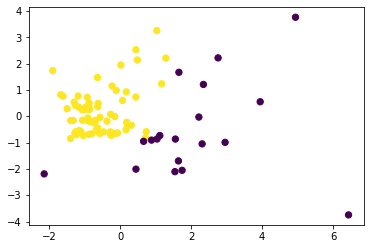

In [6]:
panic = gmm.modelFromBow(bowMatrix)

In [7]:
print(panic)

[[1.14956365e-05 9.99988504e-01]
 [1.00000000e+00 1.25342706e-85]
 [7.86464207e-08 9.99999921e-01]
 [9.99782781e-10 9.99999999e-01]
 [2.16356080e-10 1.00000000e+00]
 [6.36782713e-10 9.99999999e-01]
 [5.02989607e-10 9.99999999e-01]
 [1.92160055e-12 1.00000000e+00]
 [2.18039025e-09 9.99999998e-01]
 [6.17985563e-10 9.99999999e-01]
 [5.20262390e-47 1.00000000e+00]
 [4.51384565e-10 1.00000000e+00]
 [3.50287231e-11 1.00000000e+00]
 [7.85471453e-15 1.00000000e+00]
 [5.99515268e-10 9.99999999e-01]
 [3.61863005e-23 1.00000000e+00]
 [1.90688245e-08 9.99999981e-01]
 [5.52874719e-10 9.99999999e-01]
 [2.38323670e-11 1.00000000e+00]
 [1.18041158e-13 1.00000000e+00]
 [2.06001167e-22 1.00000000e+00]
 [2.63898751e-10 1.00000000e+00]
 [4.41803375e-11 1.00000000e+00]
 [5.63404730e-10 9.99999999e-01]
 [2.30564739e-21 1.00000000e+00]
 [8.29497876e-12 1.00000000e+00]
 [2.29798680e-20 1.00000000e+00]
 [3.94047187e-11 1.00000000e+00]
 [5.06418485e-17 1.00000000e+00]
 [7.72449276e-13 1.00000000e+00]
 [4.617396

In [8]:
onePanic = panic[:, 0]
print(onePanic)

[1.14956365e-05 1.00000000e+00 7.86464207e-08 9.99782781e-10
 2.16356080e-10 6.36782713e-10 5.02989607e-10 1.92160055e-12
 2.18039025e-09 6.17985563e-10 5.20262390e-47 4.51384565e-10
 3.50287231e-11 7.85471453e-15 5.99515268e-10 3.61863005e-23
 1.90688245e-08 5.52874719e-10 2.38323670e-11 1.18041158e-13
 2.06001167e-22 2.63898751e-10 4.41803375e-11 5.63404730e-10
 2.30564739e-21 8.29497876e-12 2.29798680e-20 3.94047187e-11
 5.06418485e-17 7.72449276e-13 4.61739680e-15 2.56271385e-10
 4.14561995e-13 5.58803622e-25 4.01887904e-18 2.66959387e-13
 2.31982259e-10 2.56802404e-15 3.39811290e-18 2.73225030e-11
 1.14936722e-08 1.75222838e-14 5.39370422e-11 8.83662844e-11
 1.79019835e-14 2.18176151e-10 1.22539197e-15 5.94004049e-10
 1.15545945e-11 2.60709996e-14 4.88998551e-11 9.60148519e-09
 1.69643195e-13 3.79586990e-16 7.45399161e-15 5.25613108e-15
 1.35299766e-22 2.35613191e-11 1.81598991e-12 1.17226136e-10
 8.18721138e-11 1.52816736e-08 7.37781871e-15 1.85028537e-22
 6.05926127e-07 1.000000

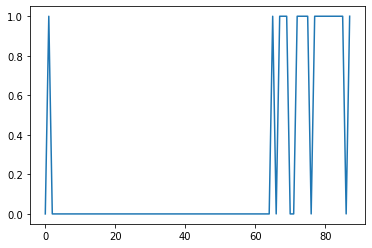

In [9]:
plt.plot(onePanic)
plt.show()